Видео лабораторной: https://youtu.be/3N0Uz33_wFI

TG: https://t.me/data_science_news



---

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Набор данных для регрессии

[Лабораторная №13](https://youtu.be/A3LE-ZmtVGs)

Model Name      | parameters | $r^2$        | Mean Squared Error|
----------------|------------|--------------|-------------------|
LR              | $\bf4$     |$0.89\pm0.04$ |$3.07\pm1.28$      |
LR poly 2       | $10$       |$0.98\pm0.01$ |$0.44\pm0.39$      |
LR poly 3       | $20$       |$\bf0.99\pm0.01$ |$\bf0.31\pm0.24$      |
NN              | $185$      |$0.91\pm1.61$ |$1.86\pm1.49$      |


In [ ]:
!wget https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv
!head Advertising.csv

--2022-04-20 05:24:38--  https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   5.04K  --.-KB/s    in 0s      

2022-04-20 05:24:38 (45.8 MB/s) - ‘Advertising.csv’ saved [5166/5166]

"","TV","Radio","Newspaper","Sales"
"1",230.1,37.8,69.2,22.1
"2",44.5,39.3,45.1,10.4
"3",17.2,45.9,69.3,9.3
"4",151.5,41.3,58.5,18.5
"5",180.8,10.8,58.4,12.9
"6",8.7,48.9,75,7.2
"7",57.5,32.8,23.5,11.8
"8",120.2,19.6,11.6,13.2
"9",8.6,2.1,1,4.8


In [ ]:
REGRESSION = pd.read_csv('Advertising.csv')
REGRESSION = REGRESSION.drop(columns=['Unnamed: 0'])
REGRESSION

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X_reg = REGRESSION.loc[:, REGRESSION.columns != 'Sales'].to_numpy()
y_reg = REGRESSION['Sales'].to_numpy()
print(X_reg.shape)
print(y_reg.shape)

(200, 3)
(200,)


In [ ]:
# split regression data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.33, random_state=0, shuffle=True)
X_reg_train.shape, X_reg_test.shape

((134, 3), (66, 3))

# Набор данных для классификации

[Лабораторная №15](https://youtu.be/lkiFy6LQnSk)

```
Logit has 0.9961 OvR AUC with a standard deviation of 0.01
LDA has 0.9937 OvR AUC with a standard deviation of 0.01
QDA has 0.9888 OvR AUC with a standard deviation of 0.02
```

In [ ]:
# download dataset
# https://archive.ics.uci.edu/ml/datasets/seeds
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
!head seeds_dataset.txt

--2022-04-20 05:26:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2022-04-20 05:26:13 (68.0 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7		5		1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1


In [ ]:
# load the data
CLASSIFICATION = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
    sep='\t',
    header=None,
    names=["area", "perimeter", "compactness", "length", "width", "asymmetry", "length_groove", "class"],
    on_bad_lines='skip')
CLASSIFICATION = CLASSIFICATION.dropna()
CLASSIFICATION["class"] = CLASSIFICATION["class"].astype('int32')
CLASSIFICATION

,area,perimeter,compactness,length,width,asymmetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
X_class = CLASSIFICATION.loc[:, CLASSIFICATION.columns != 'class'].to_numpy()
y_class = CLASSIFICATION["class"].to_numpy()
X_class.shape, y_class.shape

((199, 7), (199,))

In [ ]:
# split regression data
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.33, random_state=0, shuffle=True)
X_class_train.shape, X_class_test.shape

((133, 7), (66, 7))

# Простое дерево решений (simple decision tree)

Пусть нам даны пары наблюдений $(X_1,Y_1),...,(X_n,Y_n)$, где $X_i \in R^p$, a $Y_i$ может принимать количественные или качественные значения.

Суть подхода: разделить пространство независимых переменных (предикторов) $X^1, X^2, X^3,..,X^p$ на $J$ различных непересекющихся областей $R_1, R_2, ..., R_J$. Для набора данных $\in R_J$ выполняется единственное предсказание зависимой переменной.

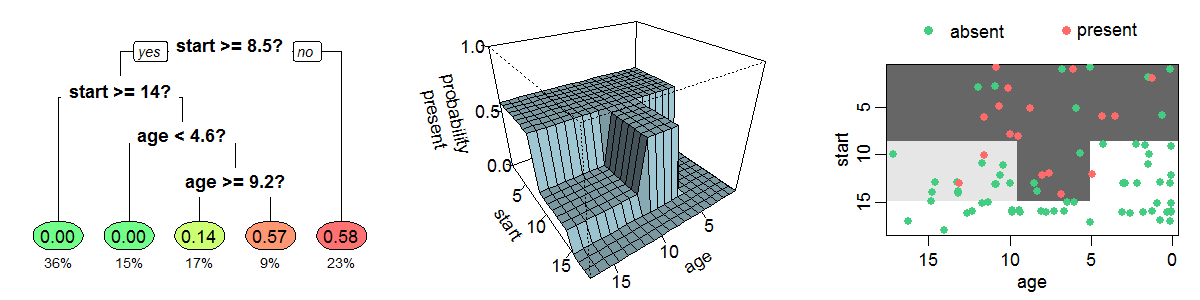

https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:Cart_tree_kyphosis.png

## Регрессия

Цель регрессии через решающие деревья найти такой набор $R_1, R_2, ..., R_J$, который минимизирует целевую функцию:

$RSS = \sum_{j=1}^J\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$

### Алгоритм рекурсивного бинарного разделения ("жадный")

Выбор предиктора $X^j$ и выборт точки разделения $s$ так что простарнство **всех** предикторов образует две области: $\{X|X^j<s\}$ и $\{X|X^j>s\}$. Выбор предиктора и точки выполняется таким образом, что бы на данном шаге **максимально** уменшить RSS. Таким образом, рассматриваются все предикторы $X^1,..,X^J$ и все варианты $s$ для каждого предиктора.

То есть, для каждого $j$ и $s$ задаётся пара:

$R_1(j,s)=\{X|X^j<s\}$ и $R_2(j,s)=\{X|X^j \geq s\}$ таким образом, что $j$ и $s$ минимизируют целевую функции в виде:

$\sum_{i:x_i \in R_1(j,s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i:x_i \in R_2(j,s)}(y_i - \hat{y}_{R_2})^2$, где $\hat{y}_{R_{1,2}}$ - это выборочное среднее в $R_{1,2}(j,s)$.

Далее, процее повторяется, но уже для разделения одного из $R_j$ полученных на предыдущих шагах до выполнения условия остановки. Например, условием остановки может быть то, каждая область включает на более 10 наблюдений.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
simple_dt_reg = tree.DecisionTreeRegressor(random_state=0, max_depth=3)
simple_dt_reg.fit(X_reg_train, y_reg_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'X[0] <= 130.25\nsquared_error = 27.346\nsamples = 134\nvalue = 14.33'),
 Text(0.25, 0.625, 'X[0] <= 33.3\nsquared_error = 7.449\nsamples = 55\nvalue = 9.985'),
 Text(0.125, 0.375, 'X[1] <= 31.45\nsquared_error = 2.474\nsamples = 16\nvalue = 6.894'),
 Text(0.0625, 0.125, 'squared_error = 1.528\nsamples = 10\nvalue = 6.08'),
 Text(0.1875, 0.125, 'squared_error = 1.109\nsamples = 6\nvalue = 8.25'),
 Text(0.375, 0.375, 'X[2] <= 49.0\nsquared_error = 3.959\nsamples = 39\nvalue = 11.254'),
 Text(0.3125, 0.125, 'squared_error = 1.996\nsamples = 33\nvalue = 10.67'),
 Text(0.4375, 0.125, 'squared_error = 2.556\nsamples = 6\nvalue = 14.467'),
 Text(0.75, 0.625, 'X[1] <= 26.85\nsquared_error = 18.91\nsamples = 79\nvalue = 17.354'),
 Text(0.625, 0.375, 'X[1] <= 9.7\nsquared_error = 3.248\nsamples = 36\nvalue = 13.311'),
 Text(0.5625, 0.125, 'squared_error = 0.853\nsamples = 19\nvalue = 11.921'),
 Text(0.6875, 0.125, 'squared_error = 1.352\nsamples = 17\nvalue = 14.865'),
 Text(0

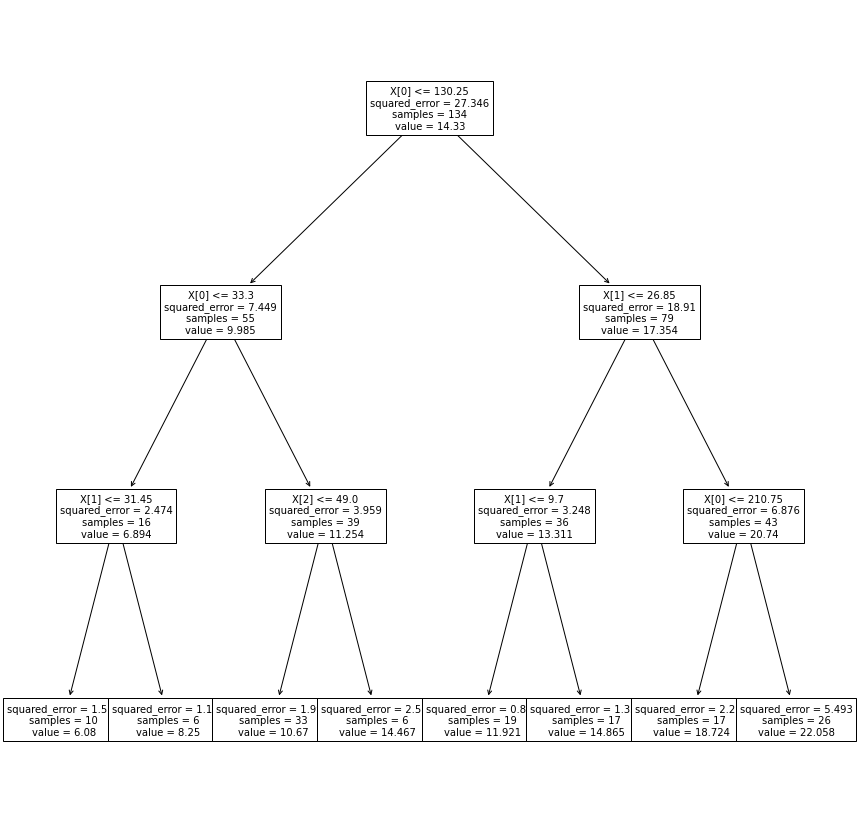

In [ ]:
# https://scikit-learn.org/stable/modules/tree.html
plt.rcParams['figure.figsize'] = [15, 15]
tree.plot_tree(simple_dt_reg, fontsize=10)

In [ ]:
simple_dt_reg = tree.DecisionTreeRegressor(random_state=0)
simple_dt_reg.fit(X_reg_train, y_reg_train)
y_true = y_reg_test
y_pred = simple_dt_reg.predict(X_reg_test)
r2_score(y_true, y_pred), mean_squared_error(y_true, y_pred)

(0.923650758203275, 1.9833333333333334)

[Text(0.43275375939849625, 0.9583333333333334, 'X[0] <= 130.25\nsquared_error = 27.346\nsamples = 134\nvalue = 14.33'),
 Text(0.1756578947368421, 0.875, 'X[0] <= 33.3\nsquared_error = 7.449\nsamples = 55\nvalue = 9.985'),
 Text(0.04962406015037594, 0.7916666666666666, 'X[1] <= 31.45\nsquared_error = 2.474\nsamples = 16\nvalue = 6.894'),
 Text(0.02406015037593985, 0.7083333333333334, 'X[0] <= 18.0\nsquared_error = 1.528\nsamples = 10\nvalue = 6.08'),
 Text(0.012030075187969926, 0.625, 'X[0] <= 4.75\nsquared_error = 0.938\nsamples = 5\nvalue = 5.08'),
 Text(0.006015037593984963, 0.5416666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.01804511278195489, 0.5416666666666666, 'X[0] <= 15.15\nsquared_error = 0.067\nsamples = 4\nvalue = 5.55'),
 Text(0.012030075187969926, 0.4583333333333333, 'X[2] <= 5.75\nsquared_error = 0.036\nsamples = 3\nvalue = 5.433'),
 Text(0.006015037593984963, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 5.7'),
 Text(0.01804511278195489, 0.3

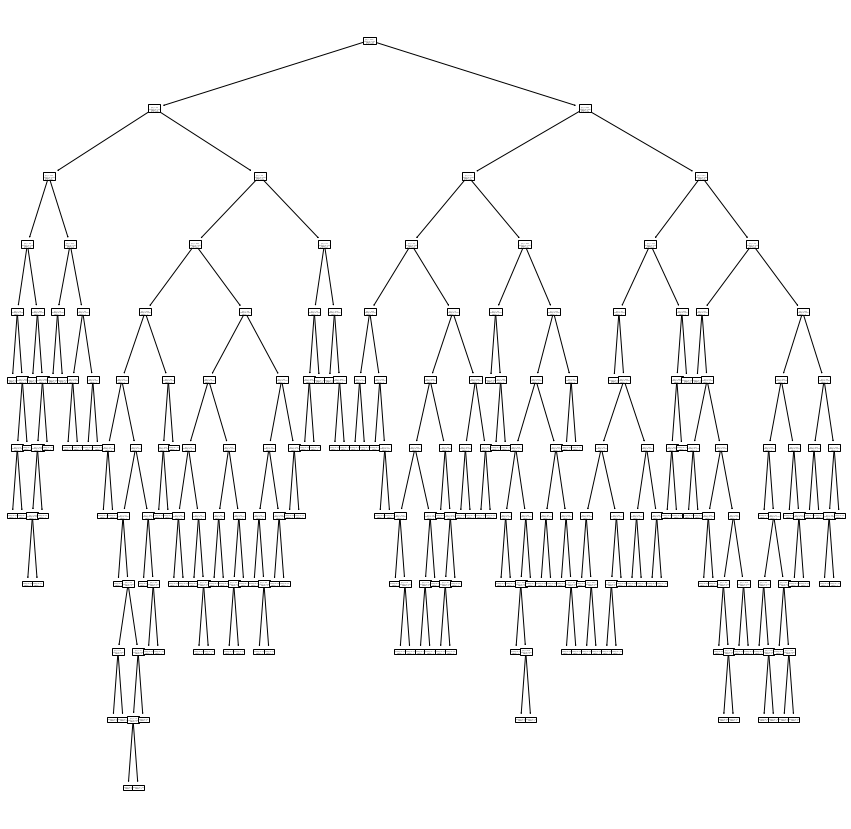

In [ ]:
tree.plot_tree(simple_dt_reg)

In [ ]:
simple_dt_reg = tree.DecisionTreeRegressor(random_state=0)

scores = cross_val_score(simple_dt_reg, X_reg, y_reg, cv=5)
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(simple_dt_reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 R^2 with a standard deviation of 0.01
-1.23 MSE with a standard deviation of 0.26


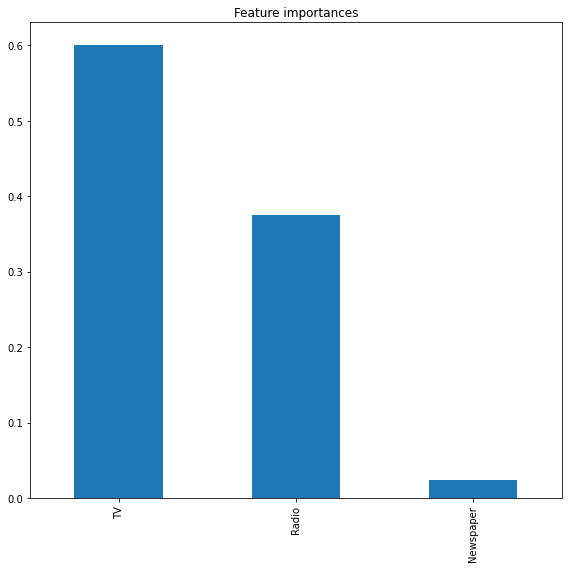

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
simple_dt_reg = tree.DecisionTreeRegressor(random_state=0)
simple_dt_reg.fit(X_reg_train, y_reg_train)
importances = simple_dt_reg.feature_importances_
feature_names = ["TV", "Radio", "Newspaper"]
forest_importances = pd.Series(importances, index=feature_names)
#std = np.std([tree.feature_importances_ for tree in simple_dt_reg.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

## Классификация

Аналогично задаче регрессии выполняется жадный алгоритм бинарного деления, но целевая функция соответсвует качественным данных.

Варианты целевой функции:
1. Gini index $G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$
2. Entropy $D = -\sum_{k=1}^K \hat{p}_{mk}\log(\hat{p}_{mk})$

где $\hat{p}_{mk}$ это отношение частоты наблюдений класса $k$ к общему числу наблюдений в области $m$.


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
simple_dt_class = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
simple_dt_class.fit(X_class_train, y_class_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.625, 0.875, 'X[6] <= 5.615\ngini = 0.664\nsamples = 133\nvalue = [44, 49, 40]'),
 Text(0.5, 0.625, 'X[0] <= 13.115\ngini = 0.51\nsamples = 85\nvalue = [44, 1, 40]'),
 Text(0.25, 0.375, 'X[6] <= 4.826\ngini = 0.227\nsamples = 46\nvalue = [6, 0, 40]'),
 Text(0.125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(0.375, 0.125, 'gini = 0.049\nsamples = 40\nvalue = [1, 0, 39]'),
 Text(0.75, 0.375, 'X[4] <= 3.544\ngini = 0.05\nsamples = 39\nvalue = [38, 1, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]')]

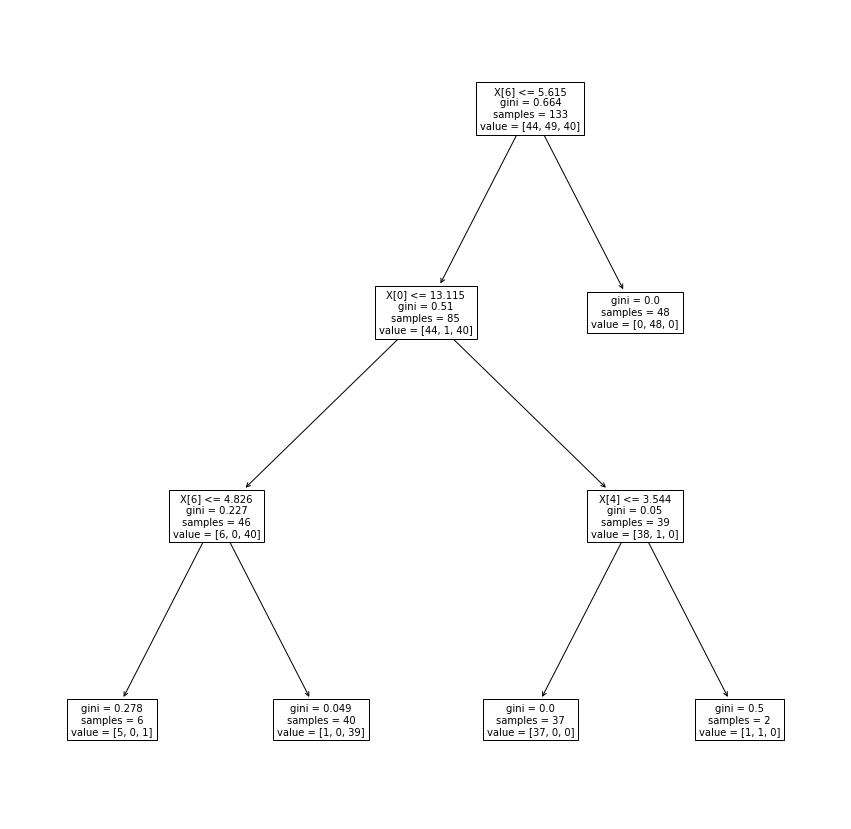

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]
tree.plot_tree(simple_dt_class, fontsize=10)

In [ ]:
simple_dt_class = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(simple_dt_class, X_class, y_class, cv=5, scoring='roc_auc_ovr')
print("Simple DT has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Simple DT has 0.9135 OvR AUC with a standard deviation of 0.03


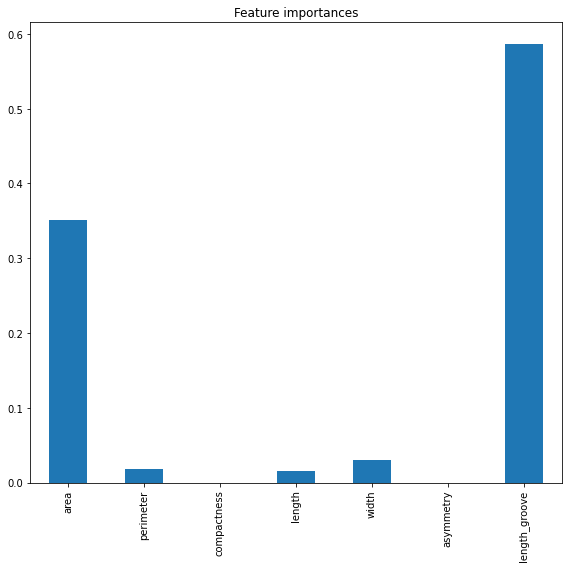

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
simple_dt_class = tree.DecisionTreeClassifier(random_state=0)
simple_dt_class.fit(X_class_train, y_class_train)
importances = simple_dt_class.feature_importances_
feature_names = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "length_groove"]
forest_importances = pd.Series(importances, index=feature_names)
#std = np.std([tree.feature_importances_ for tree in simple_dt_reg.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

# Ансабли моделей

In [ ]:
# https://scikit-learn.org/stable/modules/ensemble.html

## Bagging


Алгоритм:

1. Симулировать $B$ различны тренирововчных данных (на основе ECDF).
2. Построить $B$ моделей $\hat{f}^1(x),\hat{f}^2(x),...,\hat{f}^B(x)$ с использование $B$ наборов данных методом бинарного деления.
3. Взять среднее значение (для регрессии) или принять класс большинством предсказаний (классификация): $\hat{f}^{bag}(x)=\frac{1}{B}\sum_{b=1}^B\hat{f}^b(x)$



### Регрессия

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
bagging_reg = BaggingRegressor(n_estimators=10, random_state=0)
scores = cross_val_score(bagging_reg, X_reg, y_reg, cv=5)
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(bagging_reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 R^2 with a standard deviation of 0.01
-0.84 MSE with a standard deviation of 0.28


### Классификация

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging_class = BaggingClassifier(random_state=0)
scores = cross_val_score(bagging_class, X_class, y_class, cv=5, scoring='roc_auc_ovr')
print("bagging has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

bagging has 0.9814 OvR AUC with a standard deviation of 0.01


## Random forest


Алгоритм:

1. Симулировать $B$ различных тренировочных данных (на основе ECDF).
2. Построить $B$ моделей $\hat{f}^1(x),\hat{f}^2(x),...,\hat{f}^B(x)$ с использование $B$ наборов данных методом бинарного деления. **Для каждого дерева выбираются $m$ предикторов $m \leq p$**.
3. Взять среднее значение (для регрессии) или принять класс большинством предсказаний (классификация): $\hat{f}^{bag}(x)=\frac{1}{B}\sum_{b=1}^B\hat{f}^b(x)$

### Регрессия


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
scores = cross_val_score(random_forest_reg, X_reg, y_reg, cv=5)
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(random_forest_reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 R^2 with a standard deviation of 0.01
-0.64 MSE with a standard deviation of 0.23


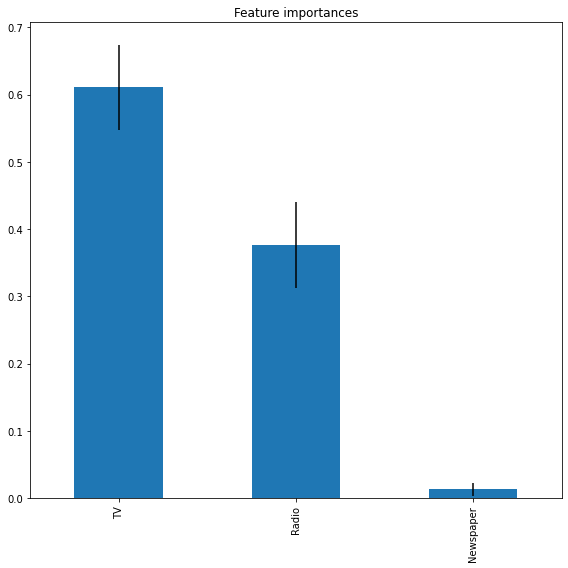

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_reg_train, y_reg_train)
importances = random_forest_reg.feature_importances_
feature_names = ["TV", "Radio", "Newspaper"]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in random_forest_reg.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

### Классификация

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
random_forest_class = RandomForestClassifier(random_state=0)
scores = cross_val_score(random_forest_class, X_class, y_class, cv=5, scoring='roc_auc_ovr')
print("Random Forest has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Random Forest has 0.9832 OvR AUC with a standard deviation of 0.02


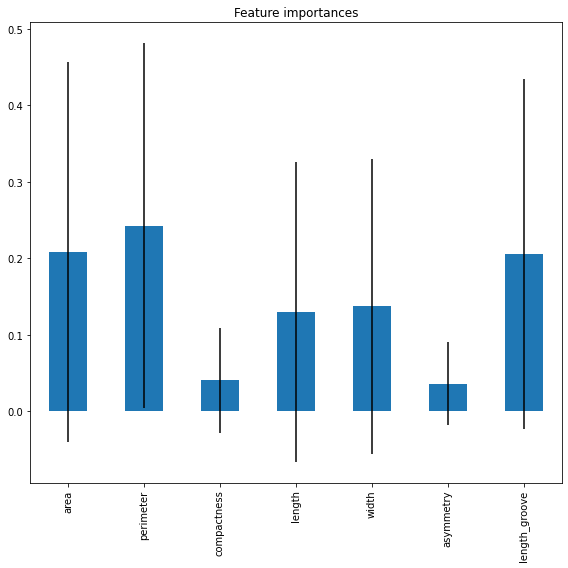

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
random_forest_class = RandomForestClassifier(random_state=0)
random_forest_class.fit(X_class_train, y_class_train)
importances = random_forest_class.feature_importances_
feature_names = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "length_groove"]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in random_forest_class.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

## Boosting

Алгоритм:

1. Инициализация $f_0(x)=\mathrm{argmin}_\gamma\sum_{i=1}^N L(y_i,\gamma)$
2. Для $m=1,2,...,M$:

(а) вычисление псевдо-невязок (pseudo-residuals): $r_{im}=-\left[ \frac{\partial L(y_i, f(x_i))}{\partial f(x_i)} \right]_{f=f_{m-1}}$ для $i=1,2,...,N$

(б) подбор дерева на наборе $\{(x_i,r_{im}) \}_{i=1}^N$ для заданного набора областей $R_{jm}$, $j=1,2,...,J_m$

(в) вычислить множитель $\gamma$:

$\gamma_{m}=\mathrm{argmin}_\gamma \sum_{x_i \in R_{jm}}L(y_i,f_{m-1}(x_i)+\gamma)$

г) обновить модель: $f_m(x)=f_{m-1}(x)+\alpha\sum_{j=1}^{J_m}\gamma_m I(x \in R_{jm})$

### Регрессия

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor
boosting_reg = GradientBoostingRegressor(random_state=0, criterion='squared_error', learning_rate=0.1)
scores = cross_val_score(boosting_reg, X_reg, y_reg, cv=5)
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(boosting_reg, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 R^2 with a standard deviation of 0.01
-0.59 MSE with a standard deviation of 0.24


 ### Классификация

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
boosting_class = GradientBoostingClassifier(random_state=0, n_estimators=1000, max_depth=3, learning_rate=0.9)
scores = cross_val_score(boosting_class, X_class, y_class, cv=5, scoring='roc_auc_ovr')
print("Boosting has %0.4f OvR AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Boosting has 0.9842 OvR AUC with a standard deviation of 0.03


# Выбор модели


## Регрессия



Model Name      | $r^2$            | Mean Squared Error|
----------------|------------------|-------------------|
LR              |$0.89\pm0.04$     |$3.07\pm1.28$      |
LR poly 2       |$0.98\pm0.01$     |$0.44\pm0.39$      |
LR poly 3       |$\bf0.99\pm0.01$  |$\bf0.31\pm0.24$   |
NN              |$0.91\pm1.61$     |$1.86\pm1.49$      |
Simple DT       |$0.95\pm0.1$      |$1.23 \pm0.26$     |
Bagging         |$0.97 \pm0.1$      |$0.84 \pm0.28$     |  
Random Forest   |$0.98\pm0.1$      |$0.64 \pm0.23$     |  
Boosting        |$0.98\pm0.1$      |$0.59 \pm0.24$     |  

## Классификация

```
Logit has            0.9961 ± 0.01 OvR AUC
LDA has              0.9937 ± 0.01 OvR AUC
QDA has              0.9888 ± 0.02 OvR AUC
Simple DT has        0.9135 ± 0.03 OvR AUC
bagging has          0.9814 ± 0.01 OvR AUC
Random Forest has    0.9832 ± 0.02 OvR AUC
Boosting has         0.9842 ± 0.03 OvR AUC
```